In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

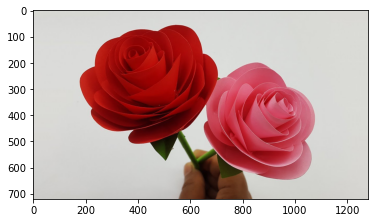

In [31]:
img = plt.imread('rose.jpg')
plt.imshow(img)

In [32]:
src_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fftImg = np.fft.fft2(src_img)

In [43]:
imgSort = np.sort(np.abs(fftImg.ravel()))
n = len(imgSort)
img_set = []
title_set = []
for keep in (0.75 , 0.5 , 0.1 , 0.05 , 0.01, 0.001 , 0.0001):

    thresh = imgSort[int(np.floor(n * (1 - keep)))]
    # ind = np.abs(fftImg) > thresh
    allow_pass = np.where(abs(fftImg)>thresh,fftImg,0)
    
    ifftImg = np.fft.ifft2(allow_pass).real
    img_set.append(ifftImg)
    title_set.append(f"Compressed (keep = {keep*100}%)")

In [44]:
def plot_img(img_set , title_set):
    n = len(img_set)
    r , c = 3,3
    plt.figure(figsize=(20,20))
    for i in range(n):
        plt.subplot(r,c,i+1)
        plt.title(title_set[i])
        plt.imshow(img_set[i],cmap='gray')
        
    
    plt.savefig('output.png',bbox_inches='tight')
    plt.show()

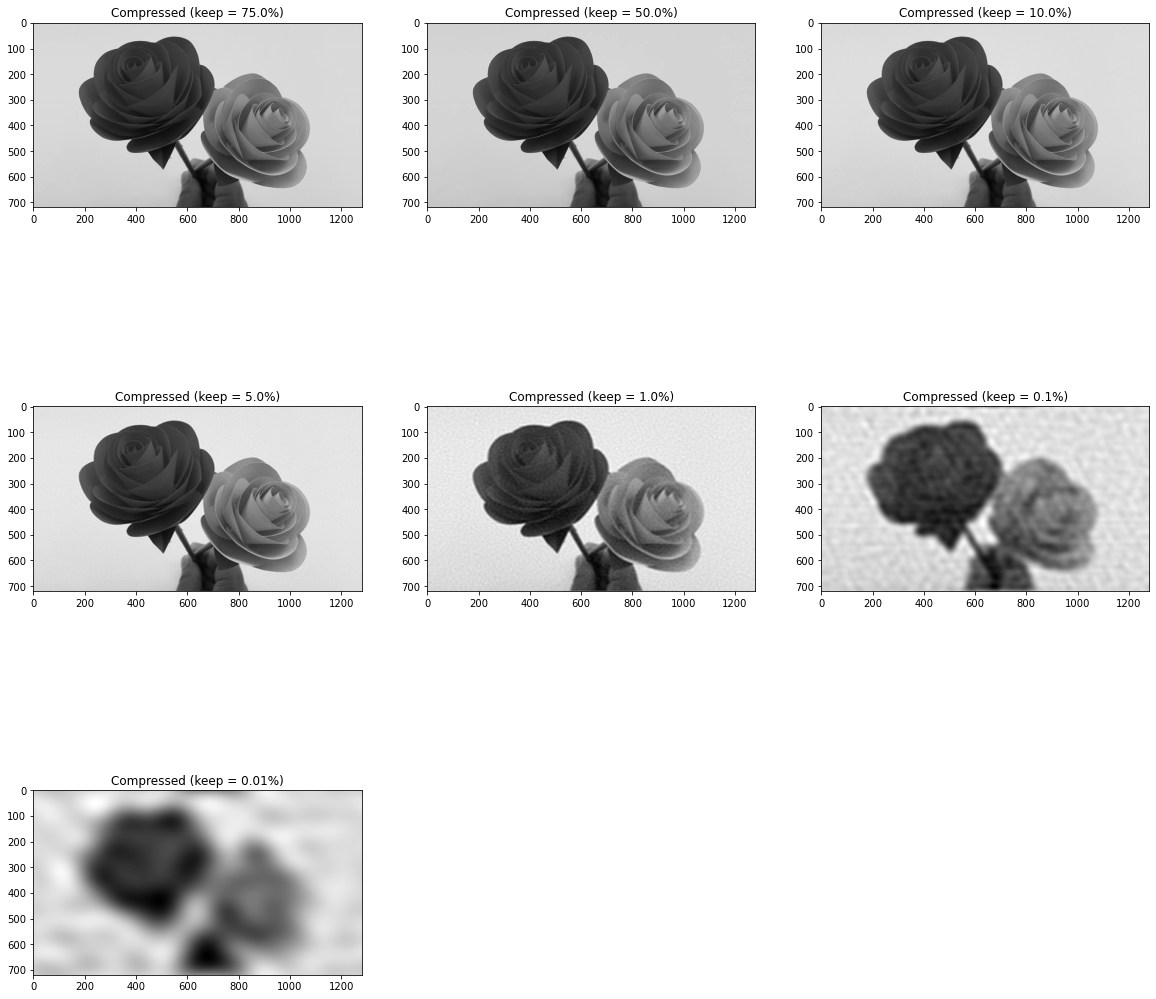

In [45]:
plot_img(img_set,title_set)